In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [8]:
os.getcwd()

'C:\\Users\\Rishi'

In [10]:
os.chdir('C:\\Users\\Rishi\\OneDrive\\Desktop\\Data Sci\\Acmegrade Data Science July_23 Files\\Jul 23 DS Day 16\\Projects\\PRJ Car Price Prediction')

In [11]:
os.getcwd()

'C:\\Users\\Rishi\\OneDrive\\Desktop\\Data Sci\\Acmegrade Data Science July_23 Files\\Jul 23 DS Day 16\\Projects\\PRJ Car Price Prediction'

In [12]:
df=pd.read_csv("audi.csv")

In [13]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [19]:
len(df)

10668

In [20]:
df.shape

(10668, 9)

In [21]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [45]:
df.info

<bound method DataFrame.info of       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 col

In [46]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [48]:
x=df.iloc[:,[0,1,3,4,5,6,7,8]].values

In [49]:
display(x.shape)

(10668, 8)

In [50]:
display(x)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [51]:
y=df.iloc[:,[2]].values

In [52]:
display(y)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [54]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
x[:,0]=l.fit_transform(x[:,0])
l1=LabelEncoder()
x[:,-4]=l1.fit_transform(x[:,-4])


In [55]:
display(pd.DataFrame(x))

,0,1,2,3,4,5,6,7
0,0,2017,Manual,15735,2,150,55.4,1.4
1,5,2016,Automatic,36203,0,20,64.2,2.0
2,0,2016,Manual,29946,2,30,55.4,1.4
3,3,2017,Automatic,25952,0,145,67.3,2.0
4,2,2019,Manual,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,2,2020,Manual,4018,2,145,49.6,1.0
10664,2,2020,Manual,1978,2,150,49.6,1.0
10665,2,2020,Manual,609,2,150,49.6,1.0
10666,9,2017,Automatic,8646,2,150,47.9,1.4


In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
x = ct.fit_transform(x)
display (x.shape)
display (pd.DataFrame(x))


(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
display (pd.DataFrame(x))


,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [60]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.2,random_state=10)
print (x.shape, y.shape)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


In [105]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(x_test)
display(y_pred)
display(y_test)

array([[28901.73005588],
       [13758.73005588],
       [30383.23005588],
       ...,
       [20153.73005588],
       [18903.23005588],
       [26650.73005588]])

array([[28990],
       [16890],
       [26295],
       ...,
       [18990],
       [16500],
       [23990]], dtype=int64)

In [73]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[28901.73005588 28990.        ]
 [13758.73005588 16890.        ]
 [30383.23005588 26295.        ]
 ...
 [20153.73005588 18990.        ]
 [18903.23005588 16500.        ]
 [26650.73005588 23990.        ]]


In [81]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 Score ', r2_score(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred))

R2 Score  0.7987144237829706
Mean Absolute Error 3292.9652164228855


In [85]:
lr_pred=lr.predict(x)

In [86]:
print('R2 Score ', r2_score(y, lr_pred))
print('Mean Absolute Error', mean_absolute_error(y,lr_pred))

R2 Score  0.7907372802334496
Mean Absolute Error 3345.247773166924


In [98]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [99]:
y1_pred = dt.predict(x_test)
dt_pred=dt.predict(x)
display(y1_pred)
display(y_test)

array([26800., 16690., 27840., ..., 19450., 18575., 24451.])

array([[28990],
       [16890],
       [26295],
       ...,
       [18990],
       [16500],
       [23990]], dtype=int64)

In [100]:
print(np.concatenate((y1_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[26800. 28990.]
 [16690. 16890.]
 [27840. 26295.]
 ...
 [19450. 18990.]
 [18575. 16500.]
 [24451. 23990.]]


In [101]:
print('R2 Score test ', r2_score(y_test, y1_pred))
print('Mean Absolute Error test', mean_absolute_error(y_test,y1_pred))


R2 Score test  0.935333764694106
Mean Absolute Error test 1872.1680698739976


In [102]:
display(dt_pred)

array([12495., 16500., 11000., ..., 17199., 19499., 15999.])

In [103]:
print('R2 Score total', r2_score(y, dt_pred))
print('Mean Absolute Error total', mean_absolute_error(y,dt_pred))

R2 Score total 0.9869777290397849
Mean Absolute Error total 418.20851612298463


In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=10)
rf.fit(x_train,y_train)
display (rf)


RandomForestRegressor(random_state=10)

In [112]:
y2_pred = rf.predict(x_test)
rf_pred=rf.predict(x)
display(y2_pred)
display(y_test)

array([26753.54, 16939.07, 27644.95, ..., 19860.45, 17283.17, 23715.51])

array([[28990],
       [16890],
       [26295],
       ...,
       [18990],
       [16500],
       [23990]], dtype=int64)

In [113]:
np.concatenate((y2_pred.reshape(len(y2_pred),1),y_test.reshape(len(y_test),1)),1)

array([[26753.54, 28990.  ],
       [16939.07, 16890.  ],
       [27644.95, 26295.  ],
       ...,
       [19860.45, 18990.  ],
       [17283.17, 16500.  ],
       [23715.51, 23990.  ]])

In [114]:
print('R2 Score test ', r2_score(y_test, y2_pred))
print('Mean Absolute Error test', mean_absolute_error(y_test,y2_pred))

R2 Score test  0.9600527756416679
Mean Absolute Error test 1500.742236963924


In [115]:
print('R2 Score test ', r2_score(y, rf_pred))
print('Mean Absolute Error test', mean_absolute_error(y,rf_pred))

R2 Score test  0.9874498308077364
Mean Absolute Error test 772.0425979929853


In [116]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [117]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 3062.5947385839754
RMSE value for k=  2 is: 2874.049582117296
RMSE value for k=  3 is: 2761.9315739178764
RMSE value for k=  4 is: 2748.8798241635263
RMSE value for k=  5 is: 2752.3926242987727
RMSE value for k=  6 is: 2765.5343014262917
RMSE value for k=  7 is: 2799.945997413555
RMSE value for k=  8 is: 2763.6448713615373
RMSE value for k=  9 is: 2832.3928611838364
RMSE value for k=  10 is: 2869.726201370806
RMSE value for k=  11 is: 2920.679788147894
RMSE value for k=  12 is: 2977.3181155212287
RMSE value for k=  13 is: 3031.5904797401477
RMSE value for k=  14 is: 3059.715418449165
RMSE value for k=  15 is: 3109.0298297391173
RMSE value for k=  16 is: 3155.2254721984305
RMSE value for k=  17 is: 3203.333278927144
RMSE value for k=  18 is: 3248.608886859538
RMSE value for k=  19 is: 3274.712009355196
RMSE value for k=  20 is: 3306.3776381759667


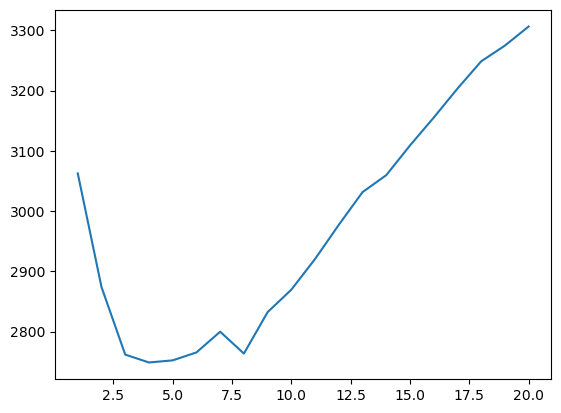

In [118]:
plt.plot(range(1,21),rmse_val)
plt.show()

In [123]:
min(rmse_val)

2748.8798241635263

In [124]:
n = np.where(acc_val == max(acc_val))[0]
n

array([3], dtype=int64)

In [120]:
acc_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    acc= r2_score (y_test,pred) #calculate accuracy
    acc_val.append(acc) #store accuracy to list
    print('Accuracy value for k= ' , K , 'is:', acc)

Accuracy value for k=  1 is: 0.9273167906984308
Accuracy value for k=  2 is: 0.935990631388822
Accuracy value for k=  3 is: 0.94088729124688
Accuracy value for k=  4 is: 0.9414446557640928
Accuracy value for k=  5 is: 0.9412949041108754
Accuracy value for k=  6 is: 0.9407329746928669
Accuracy value for k=  7 is: 0.9392488726660835
Accuracy value for k=  8 is: 0.940813930222065
Accuracy value for k=  9 is: 0.9378326989431933
Accuracy value for k=  10 is: 0.936183062812717
Accuracy value for k=  11 is: 0.9338967333825504
Accuracy value for k=  12 is: 0.9313081028800262
Accuracy value for k=  13 is: 0.9287809624862382
Accuracy value for k=  14 is: 0.9274533937221121
Accuracy value for k=  15 is: 0.9250960347571093
Accuracy value for k=  16 is: 0.9228535706956034
Accuracy value for k=  17 is: 0.9204831290041209
Accuracy value for k=  18 is: 0.9182194763506082
Accuracy value for k=  19 is: 0.9168999555663022
Accuracy value for k=  20 is: 0.9152850729685222


In [121]:
max(acc_val)

0.9414446557640928

In [132]:
n = np.where(acc_val == max(acc_val))[0]
k=n[0]
print(k)

3


In [133]:
knn = neighbors.KNeighborsRegressor(n_neighbors = k)
knn.fit(x_train, y_train)
print (knn)


KNeighborsRegressor(n_neighbors=3)


In [134]:
y3_pred = knn.predict(x_test)
knn_pred=knn.predict(x)
display(y3_pred)
display(y_test)

array([[26926.66666667],
       [15295.66666667],
       [27260.        ],
       ...,
       [18577.33333333],
       [17125.33333333],
       [20030.        ]])

array([[28990],
       [16890],
       [26295],
       ...,
       [18990],
       [16500],
       [23990]], dtype=int64)

In [136]:
print('R2 Score test ', r2_score(y_test, y3_pred))
print('Mean Absolute Error test', mean_absolute_error(y_test,y3_pred))

R2 Score test  0.94088729124688
Mean Absolute Error test 1746.4137769447048


In [137]:
print('R2 Score test ', r2_score(y, knn_pred))
print('Mean Absolute Error test', mean_absolute_error(y,knn_pred))

R2 Score test  0.9674510134407576
Mean Absolute Error test 1325.027152855893


In [151]:
from sklearn.ensemble import  ExtraTreesRegressor
et=ExtraTreesRegressor(random_state=10)
et.fit(x_train,y_train)
y4_pred=et.predict(x_test)
et_pred=et.predict(x)
print(y4_pred)
print(y_test)

[26648.08 16889.06 27309.29 ... 19541.44 16679.62 24531.38]
[[28990]
 [16890]
 [26295]
 ...
 [18990]
 [16500]
 [23990]]


In [152]:
print('R2 Score test ', r2_score(y_test, y4_pred))
print('Mean Absolute Error test', mean_absolute_error(y_test,y4_pred))

R2 Score test  0.9580502505093127
Mean Absolute Error test 1522.7173860902844


In [153]:
print('R2 Score test ', r2_score(y, et_pred))
print('Mean Absolute Error test', mean_absolute_error(y,et_pred))

R2 Score test  0.9912509135063048
Mean Absolute Error test 348.41414424499027
